In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.6.10
IPython 7.13.0

sklearn 0.0
numpy 1.14.2
scipy 1.2.1


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as pltW
import os
import shutil
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
import random

tf.app.flags.DEFINE_string("data_path", "./human-gait-dataset/", "Data path.")

In [3]:
# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다.
# 최소값과 최대값을 이용하여 0 ~ 1 사이의 값으로 변환 
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방


root:  ./human-gait-dataset
files:  ['sub10_s1.csv', 'sub10_s2.csv', 'sub11_s1.csv', 'sub12_s2.csv', 'sub13_s1.csv', 'sub14_s1.csv', 'sub14_s2.csv', 'sub15_s1.csv', 'sub15_s2.csv', 'sub16_s1.csv', 'sub16_s2.csv', 'sub17_s1.csv', 'sub18_s1.csv', 'sub18_s2.csv', 'sub19_s1.csv', 'sub19_s2.csv', 'sub1_s1.csv', 'sub1_s2.csv', 'sub20_s1.csv', 'sub20_s2.csv', 'sub21_s1.csv', 'sub21_s2.csv', 'sub22_s1.csv', 'sub22_s2.csv', 'sub23_s1.csv', 'sub23_s2.csv', 'sub24_s1.csv', 'sub24_s2.csv', 'sub25_s1.csv', 'sub25_s2.csv', 'sub26_s1.csv', 'sub27_s1.csv', 'sub27_s2.csv', 'sub28_s1.csv', 'sub29_s2.csv', 'sub2_s2.csv', 'sub30_s1.csv', 'sub30_s2.csv', 'sub31_s1.csv', 'sub31_s2.csv', 'sub32_s2.csv', 'sub33_s1.csv', 'sub34_s2.csv', 'sub35_s1.csv', 'sub36_s1.csv', 'sub37_s1.csv', 'sub38_s1.csv', 'sub38_s2.csv', 'sub39_s1.csv', 'sub3_s1.csv', 'sub40_s1.csv', 'sub41_s1.csv', 'sub42_s2.csv', 'sub43_s2.csv', 'sub44_s1.csv', 'sub45_s1.csv', 'sub46_s1.csv', 'sub46_s2.csv', 'sub47_s1.csv', 'sub48_s1.csv', 'sub49_

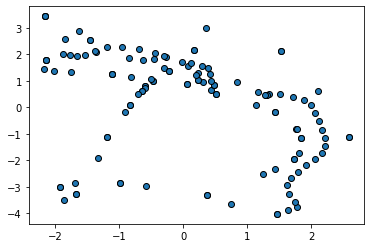

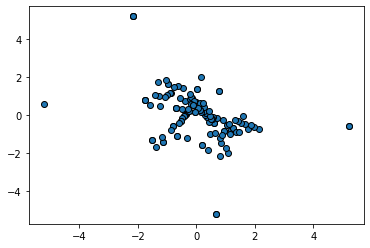

processing: 0.00
processing: 0.01
processing: 0.02
processing: 0.03
processing: 0.04
processing: 0.05
processing: 0.05
processing: 0.06
processing: 0.07
processing: 0.08
processing: 0.09
processing: 0.10
processing: 0.11
processing: 0.12
processing: 0.13
processing: 0.14
processing: 0.15
processing: 0.15
processing: 0.16
processing: 0.17
processing: 0.18
processing: 0.19
processing: 0.20
processing: 0.21
processing: 0.22
processing: 0.23
processing: 0.24
processing: 0.25
processing: 0.25
processing: 0.26
processing: 0.27
processing: 0.28
processing: 0.29
processing: 0.30
processing: 0.31
processing: 0.32
processing: 0.33
processing: 0.34
processing: 0.35
processing: 0.35
processing: 0.36
processing: 0.37
processing: 0.38
processing: 0.39
processing: 0.40
processing: 0.41
processing: 0.42
processing: 0.43
processing: 0.44
processing: 0.45
processing: 0.45
processing: 0.46
processing: 0.47
processing: 0.48
processing: 0.49
processing: 0.50
processing: 0.51
processing: 0.52
processing: 0.

In [4]:
# 데이터 로딩
# 데이터 디렉토리
directory_root = './human-gait-dataset'

# 데이터 읽어오기
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용
for root, dirs, files in os.walk(directory_root):
    # root와 files 출력
    print("root: ", root)
    print("files: ", files)
    print("="*100)
    cnt = 0
    
    # files을 하나씩 읽어서 수행
    for file in files:
        # label을 one_hot_encoding으로 처리하기 위해 78개가 모두 0으로 처리
        label = np.zeros(78)
        
        # file이름의 숫자가 one_hot_encoding의 인덱스+1을 의미
        label_idx = int(file.split('_')[0].split('b')[1])
        label[label_idx - 1] = 1
        
        # 파일을 읽고 Unnamed: 0을 지움
        csv_file = pd.read_csv(root + '/' + file)
        del csv_file['Unnamed: 0']
        
        
        # 파일 전체를 window_size=128 로 분할하여 seqence로 만듦.
        # window_size로 나눈 나머지는 버림
        for i in range(int(len(csv_file) / 128)):
            slicing_data = np.array(csv_file[128*i:128*(i+1)])
            
            # Standardization
            if cnt == 0 and i ==0:
                plt.scatter(slicing_data[:,0], slicing_data[:,1], edgecolors='black')
                plt.show()
            quan = QuantileTransformer(output_distribution='normal', n_quantiles=128)
            quan.fit(slicing_data)
            
            S_data = quan.transform(slicing_data)
            
            if cnt == 0 and i == 0:
                plt.scatter(S_data[:,0], S_data[:,1], edgecolors='black')
                plt.show()
            
            dataX.append(S_data)
            dataY.append(label)
    
        print('processing: %0.2f' %(cnt / len(files)))
        cnt += 1
    

In [5]:
# dataX의 Sample개의 index를 만듦
idx_list = list(range(0, len(dataX)))

# 만든 list를 섞음
random.shuffle(idx_list)

In [6]:
# 학습용/테스트용 데이터 생성
# 전체의 80% 학습, 10% 유효성 검사, 10% 테스트 
train_size = int(len(dataY) * 0.8)
valid_size = int(len(dataY) * 0.1)
test_size = len(dataY) - train_size - valid_size

# 데이터 분할
trainX, trainY = [], []
validX, validY = [], []
testX, testY = [], []

for idx in idx_list[0:train_size]:
    trainX.append(dataX[idx])
    trainY.append(dataY[idx])

for idx in idx_list[train_size:train_size+valid_size]:
    validX.append(dataX[idx])
    validY.append(dataY[idx])
    
for idx in idx_list[train_size+valid_size:len(dataX)]:
    testX.append(dataX[idx])
    testY.append(dataY[idx])

trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)
validX = np.array(validX)
validY = np.array(validY)

# 데이터 모양 확인
print("trainX shape: ", np.shape(trainX))
print("trainY shape: ", np.shape(trainY))
print("validX shape: ", np.shape(validX))
print("validY shape: ", np.shape(validY))
print("testX shape: ", np.shape(testX))
print("testY shape: ", np.shape(testY))

trainX shape:  (32000, 128, 6)
trainY shape:  (32000, 78)
validX shape:  (4000, 128, 6)
validY shape:  (4000, 78)
testX shape:  (4001, 128, 6)
testY shape:  (4001, 78)


In [7]:
# 하이퍼파라미터
input_data_column_cnt = 6  # 입력데이터의 컬럼 개수 (Variable 개수)
# 총 93명의 데이터인데 데이터 전처리 후 
# 없는 사람은 총 15명
# (6, 12, 29, 45, 47)
# (48, 50, 70, 72, 73)
# (77, 84, 85, 89, 91)
# 데이터 전처리 한 사람은 93 - 15 = 78
output_data_column_cnt = 78  # 출력데이터의 컬럼 개수

seq_length = 128             # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 100    # 각 셀의 hidden 출력 크기
forget_bias = 1.0            # 망각편향(기본값 1.0)
num_stacked_layers = 3       # stacked LSTM layers 개수
keep_prob = 1.0              # dropout 할 때 keep할 비율

epoch_num = 200             # 에폭 횟수
learning_rate = 0.001        # 학습률

In [8]:
# 플레이스 홀더 생성
# 입력 X, 출력 Y 생성
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, output_data_column_cnt])
print("Y: ", Y)

# targets, predictions 생성
targets = tf.placeholder(tf.float32, [None, output_data_column_cnt])
print("targets: ", targets)
predictions = tf.placeholder(tf.float32, [None, output_data_column_cnt])
print("predictions: ", predictions)

X:  Tensor("Placeholder:0", shape=(?, 128, 6), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 78), dtype=float32)
targets:  Tensor("Placeholder_2:0", shape=(?, 78), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 78), dtype=float32)


In [9]:
# 모델 생성 - LSTM 네트워크
def lstm_cell():
    # LSTM셀 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias: to the biases of the forget gate
    #              (default: 1) in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units = rnn_cell_hidden_dim,
                                       forget_bias = forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob = keep_prob)
    return cell

# num_stacked_layer 개의 층으로 쌓인 Stacked RNN 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

# RNN Cell들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

hypothesis = tf.contrib.layers.fully_connected(hypothesis[:,-1,:], output_data_column_cnt, activation_fn=tf.identity)
print("hypothesis: ", hypothesis)

hypothesis:  Tensor("rnn/transpose_1:0", shape=(?, 128, 100), dtype=float32)
hypothesis:  Tensor("fully_connected/Identity:0", shape=(?, 78), dtype=float32)


In [10]:
# 손실함수 - cross-entropy
loss = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=hypothesis)
loss = tf.reduce_mean(loss)
#loss = tf.reduce_sum(tf.square(hypothesis - Y))

# 최적화함수 - AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
model = optimizer.minimize(loss)

# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다.
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [11]:
from tensorflow.core.protobuf import config_pb2

train_error_summary = [] # 학습용 데이터의 오류 기록
test_error_summary = [] # 테스터용 데이터의 오류 기록
test_predict = ''       # 테스터용 데이터로 예측한 결과

sess = tf.Session()
sess.run(tf.global_variables_initializer())
run_options = tf.RunOptions(report_tensor_allocations_upon_oom = True)

# batch
batch_size = 30

# 학습
start_time = datetime.datetime.now() # 시작시간
print("학습 시작")
for epoch in range(epoch_num):
    total_batch = int(trainX.shape[0]/batch_size)
    avg_cost = 0
    for i in range(total_batch):
        # batch_size만큼 데이터 읽기
        batch_xs, batch_ys = trainX[i*batch_size: (i+1)*batch_size], trainY[i*batch_size: (i+1)*batch_size]
        
        # batch_size만큼 학습
        _, _loss = sess.run([model, loss], feed_dict={X: batch_xs, Y: batch_ys})
        
        # 현재까지 평균 손실 누적
        avg_cost += _loss / total_batch
        
    print("Epoch: ", "%04d" % (epoch+1), "cost= ", '{:.4f}'.format(avg_cost))
    
        
end_time = datetime.datetime.now() # 종료시간
elapsed_time = end_time - start_time # 경과시간
print("elapsed_time: ", elapsed_time)
print("elapsed_time per epoch: ", elapsed_time/epoch_num)

학습 시작
Epoch:  0001 cost=  4.0759
Epoch:  0002 cost=  3.0974
Epoch:  0003 cost=  1.8080
Epoch:  0004 cost=  0.8947
Epoch:  0005 cost=  0.4974
Epoch:  0006 cost=  0.3079
Epoch:  0007 cost=  0.2122
Epoch:  0008 cost=  0.1617
Epoch:  0009 cost=  0.1289
Epoch:  0010 cost=  0.0983
Epoch:  0011 cost=  0.0956
Epoch:  0012 cost=  0.0713
Epoch:  0013 cost=  0.0757
Epoch:  0014 cost=  0.0482
Epoch:  0015 cost=  0.0436
Epoch:  0016 cost=  0.0527
Epoch:  0017 cost=  0.0333
Epoch:  0018 cost=  0.0396
Epoch:  0019 cost=  0.0265
Epoch:  0020 cost=  0.0209
Epoch:  0021 cost=  0.0310
Epoch:  0022 cost=  0.0253
Epoch:  0023 cost=  0.0292
Epoch:  0024 cost=  0.0161
Epoch:  0025 cost=  0.0137
Epoch:  0026 cost=  0.0277
Epoch:  0027 cost=  0.0200
Epoch:  0028 cost=  0.0150
Epoch:  0029 cost=  0.0091
Epoch:  0030 cost=  0.0272
Epoch:  0031 cost=  0.0149
Epoch:  0032 cost=  0.0120
Epoch:  0033 cost=  0.0150
Epoch:  0034 cost=  0.0102
Epoch:  0035 cost=  0.0115
Epoch:  0036 cost=  0.0175
Epoch:  0037 cost=  0.

In [12]:
# 테스트
print(hypothesis)
print(Y)
is_correct = tf.equal(hypothesis, Y)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

total_batch = int(testX.shape[0]/batch_size)
avg_acc = 0
for i in range(total_batch):
    # batch_size만큼 데이터 읽기
    batch_xs, batch_ys = testX[i*batch_size: (i+1)*batch_size], testY[i*batch_size: (i+1)*batch_size]
        
    # batch_size만큼 학습
    acc = sess.run(accuracy, feed_dict={X: batch_xs, Y: batch_ys})
        
    # 현재까지 평균 손실 누적
    avg_acc += acc / total_batch


print('정확도: %0.2f' %avg_acc)
#for val in sess.run(hypothesis, feed_dict={X: testX, Y: testY}):
#    print(val)
#    print(len(val))


Tensor("fully_connected/Identity:0", shape=(?, 78), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 78), dtype=float32)
0.0
정확도: 0.0000000000
